In [39]:
# To remove the warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
# Import all necessity liabries
import zipfile
from google.colab import drive
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# To Access the Google Drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [42]:
# To Unzip the folder
link_folder = '/content/drive/MyDrive/CNN/alzheimer_dataset.zip'
zip_ref     = zipfile.ZipFile(link_folder, 'r')
zip_ref.extractall()
zip_ref.close()

In [43]:
class FolderException(Exception):
    def __init__(self, message="A custom exception"):
        super().__init__(message)

DIRECTORY = '/content/alzheimer_dataset/dataset'
CATEGORIES = ['mild', 'moderate', 'no', 'very_mild']
CONFIRM = 0
VAL_DATA = []
TRAIN_DATA = []

for folder in os.listdir(DIRECTORY):
    FOLDER = os.path.join(DIRECTORY, folder)
    if os.path.isdir(FOLDER):
        CONFIRM = CONFIRM + 1

if CONFIRM == 2:
    for sub_folder in os.listdir(DIRECTORY):
        if sub_folder == 'test':
            print("\t" * 5,"{} folder is accessing".format(sub_folder).upper())
            print("\t" * 2,"_" * 80, '\n')
            FULL_PATH = os.path.join(DIRECTORY, sub_folder)
            for category in CATEGORIES:
                IMAGE_PATH = os.path.join(FULL_PATH, category)
                for image_filename in os.listdir(IMAGE_PATH):
                    IMAGE_PATH = os.path.join(FULL_PATH, category, image_filename)
                    if os.path.exists(IMAGE_PATH):
                        image_array = cv2.resize(cv2.imread(IMAGE_PATH),
                                                 dsize = (120, 120))
                        image_label = CATEGORIES.index(category)
                        VAL_DATA.append([image_array,
                                         image_label])
                    else:
                        print(f"Warning: Image file not found at path {IMAGE_PATH}")

                print("\t" * 5, "{} folder is completed.\n".format(category))

            print("\t" * 2,"_" * 80, '\n')

        if sub_folder == 'train':
          print("\t"*5,"{} folder is accessing".format(sub_folder).upper())
          print("\t" * 2, "_" * 80,'\n')
          FULL_PATH = os.path.join(DIRECTORY, sub_folder)
          for category in CATEGORIES:
              IMAGE_PATH = os.path.join(FULL_PATH, category)
              for image_filename in os.listdir(IMAGE_PATH):
                  IMAGE_PATH = os.path.join(FULL_PATH, category, image_filename)
                  if os.path.exists(IMAGE_PATH):
                      image_array = cv2.resize(cv2.imread(IMAGE_PATH),
                                               dsize = (120, 120))
                      image_label = CATEGORIES.index(category)
                      TRAIN_DATA.append([image_array,
                                         image_label])
                  else:
                      print(f"Warning: Image file not found at path {IMAGE_PATH}")

              print("\t" * 5,"{} folder is completed.\n".format(category))

else:
    raise FolderException('''Folder Format like:
  xyz.zip
    |
  dataset(This folder name should be kept)
    |__train
    |   |__very_mild(here all the images would be kept)
    |   |__no(here all the images would be kept)
    |   |__mild(here all the images would be kept)
    |   |__moderate(here all the images would be kept)
    |__test
      |__very_mild(here all the images would be kept)
      |__no(here all the images would be kept)
      |__mild(here all the images would be kept)
      |__moderate(here all the images would be kept)
  ''')

					 TEST FOLDER IS ACCESSING
		 ________________________________________________________________________________ 

					 mild folder is completed.

					 moderate folder is completed.

					 no folder is completed.

					 very_mild folder is completed.

		 ________________________________________________________________________________ 

					 TRAIN FOLDER IS ACCESSING
		 ________________________________________________________________________________ 

					 mild folder is completed.

					 moderate folder is completed.

					 no folder is completed.

					 very_mild folder is completed.



In [48]:
# Do shuffle Random
random.shuffle(TRAIN_DATA)
random.shuffle(VAL_DATA)

In [57]:
# Split the dataset into independent & dependent - TRAIN_DATA
X_train = []
y_train = []

for (independent, dependent) in TRAIN_DATA:
  X_train.append(independent)
  y_train.append(dependent)

In [56]:
# Split the dataset into independent & dependent - VAL_DATA
X_val = []
y_val = []

for (independent, dependent) in VAL_DATA:
  X_val.append(independent)
  y_val.append(dependent)

In [66]:
train = len(np.unique(np.array(y_train)))
test  = len(np.unique(np.array(y_val)))

assert train == 4 and test == 4
print("Total target class # {} ".format(4))

Total target class # 4 


In [68]:
# Do the normalization
X_train = np.array(X_train)
X_val   = np.array(X_val)

X_train = X_train/255
X_val   = X_val/255

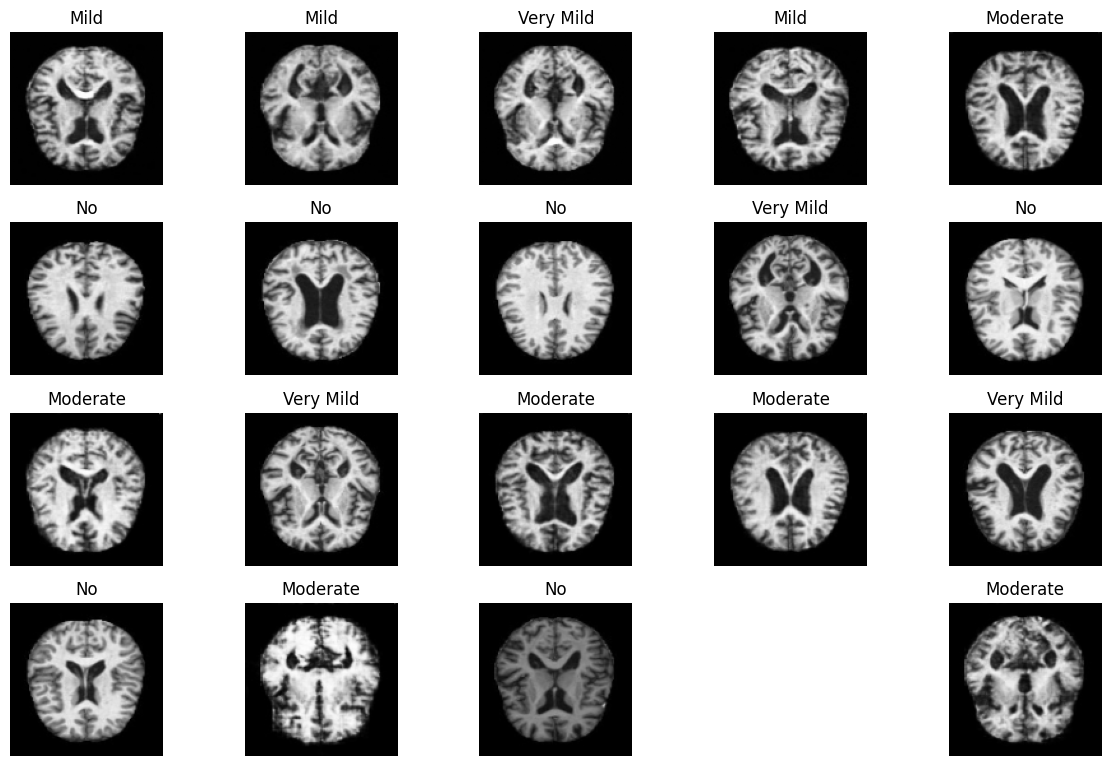

In [85]:
sample_data  = X_train[0:20]
sample_label = y_train[0:20]

plt.figure(figsize = (12, 8))

for index, image in enumerate(sample_data):
  plt.subplot(4, 5, index + 1)
  plt.imshow(image)
  plt.title('Mild' if sample_label[index] == 0\
             else 'Moderate' if sample_label[index] == 1\
             else 'No' if sample_label[index] == 2\
             else 'Very Mild'
            )
  plt.tight_layout()
  plt.axis("off")

plt.show()

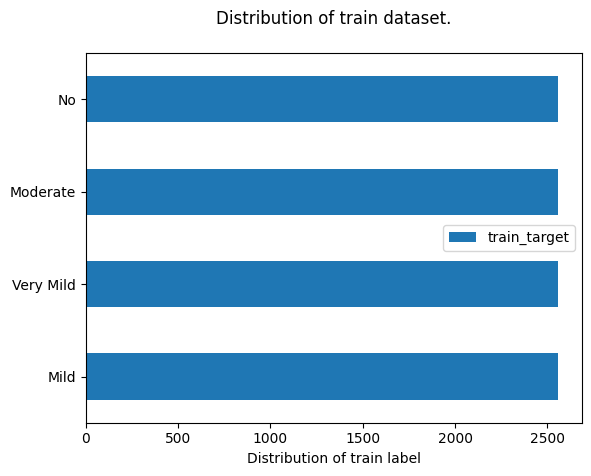

In [101]:
import pandas as pd
plt.title("Distribution of Train dataset.\n".capitalize())
df = pd.DataFrame(y_train, columns = ['train_target'])
df.loc[:, 'train_target'].map({0: 'Mild', 1: 'Moderate', 2: 'No', 3: 'Very Mild'}).value_counts().plot(kind = 'barh')
plt.xlabel("Distribution of train label")
plt.legend()
plt.show()

#Check

In [107]:
!pip install -t . git+https://github.com/atikul-islam-sajib/alzheimer_classifier_pypi.git

  Cloning https://github.com/atikul-islam-sajib/alzheimer_classifier_pypi.git to /tmp/pip-req-build-k3by3jyt
  Running command git clone --filter=blob:none --quiet https://github.com/atikul-islam-sajib/alzheimer_classifier_pypi.git /tmp/pip-req-build-k3by3jyt
  Resolved https://github.com/atikul-islam-sajib/alzheimer_classifier_pypi.git to commit a8fc730657ca4b0343b56e27bcba480ad696ea59
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 15.7 MB/s eta 0:00:00
  Using cached zipfile36-0.1.3-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [104]:
!pip show alzheimer_classifier

Name: alzheimer-classifier
Version: 0.1.0
Summary: A deep learning project that is build for predicting the Alzheimer Disease Image dataset
Home-page: https://github.com/atikul-islam-sajib/alzheimer_classifier_pypi
Author: Atikul Islam Sajib
Author-email: atikul.sajib@ptb.de
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, numpy, opencv-python, pandas, scikit-learn, torch, zipfile36
Required-by: 


In [110]:
import alzheimer_classifier

In [111]:
from alzheimer_classifier.dataset import load_data

In [112]:
loader = load_data(filename = '/content/alzheimer_dataset.zip', extract_to = '/content/')

loader.dataloader()

Unzipping is in progress. It will take some time, so please be patient.

					 TEST FOLDER IS ACCESSING
		 ________________________________________________________________________________ 

					 mild folder is completed.

					 moderate folder is completed.

					 no folder is completed.

					 very_mild folder is completed.

		 ________________________________________________________________________________ 

					 TRAIN FOLDER IS ACCESSING
		 ________________________________________________________________________________ 

					 mild folder is completed.

					 moderate folder is completed.

					 no folder is completed.

					 very_mild folder is completed.

		 ________________________________________________________________________________ 

					 DETAILS OF DATASET
		 ________________________________________________________________________________ 

					 Length of train data # 10240  

					 Length of validation data # 1279  

					 Total number of target class # 4  



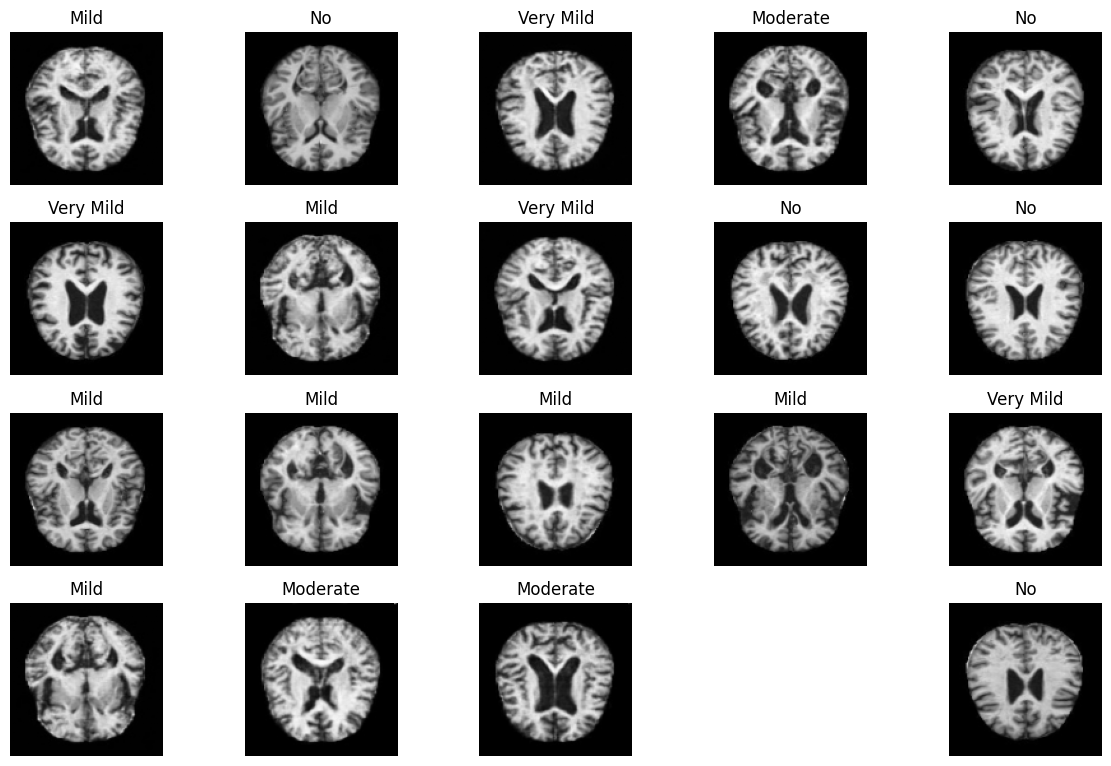

In [115]:
loader.show_plot()

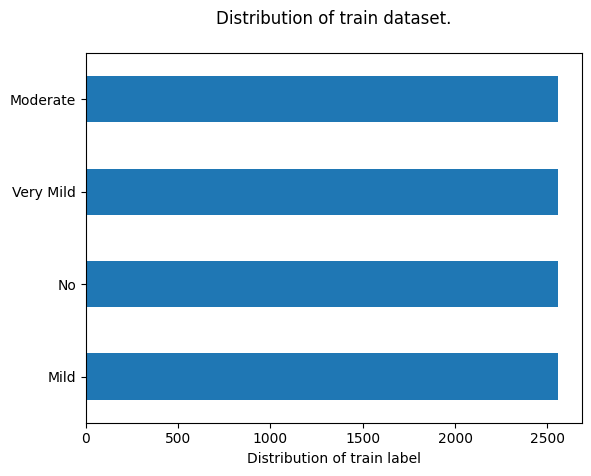

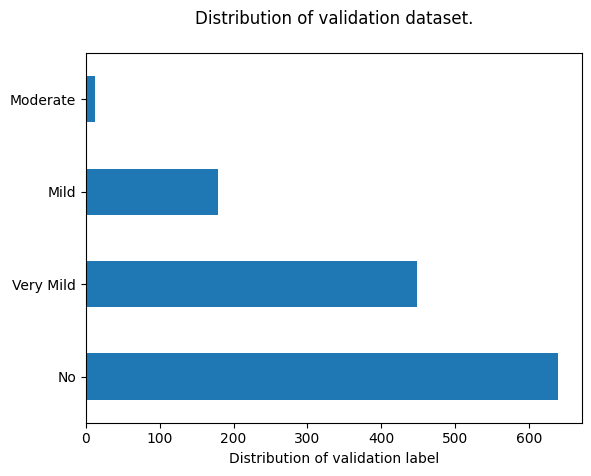

In [114]:
loader.show_distribution()